In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('/Users/david/Downloads/EcoliNet.v1.txt', sep='\t', header=None, names=['gene1', 'gene2', 'log_likelihood'])

In [3]:
df

,gene1,gene2,log_likelihood
0,b0723,b0724,6.255638
1,b0032,b0033,6.254619
2,b0722,b0723,6.254266
3,b0726,b0727,6.207392
4,b2751,b2752,6.204997
...,...,...,...
95515,b0113,b3404,0.781317
95516,b3168,b3988,0.781284
95517,b3162,b3179,0.781237
95518,b2517,b2592,0.781198


In [4]:
G = nx.from_pandas_edgelist(df, 'gene1', 'gene2', ['log_likelihood'])

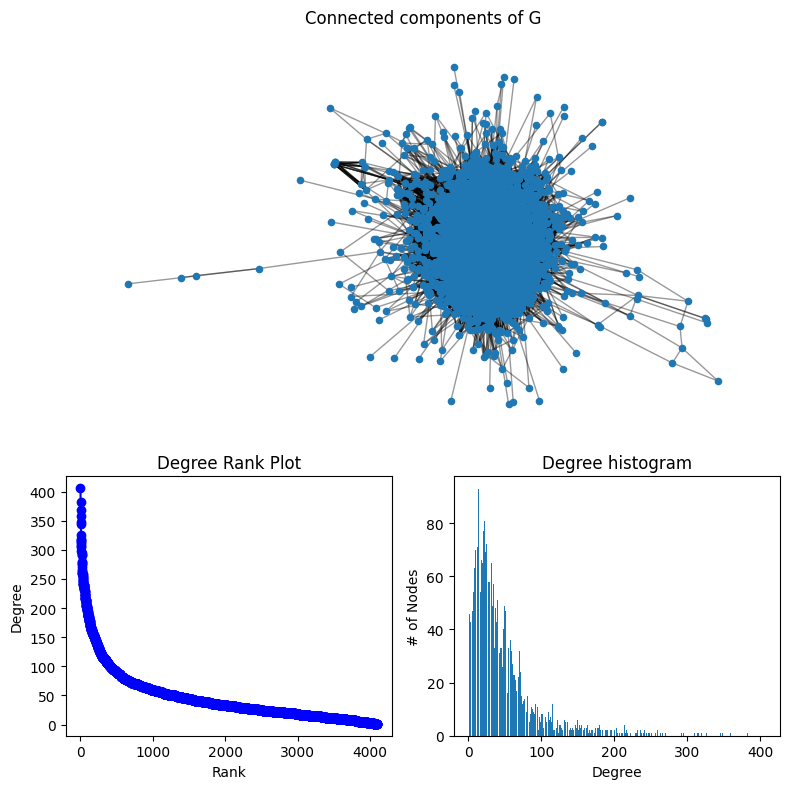

In [6]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of undirected E coli correlation graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Primary connected component of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [9]:
len(G) * (len(G) - 1)/ 2, G.number_of_edges()

(8398851.0, 95520)

In [16]:
Gd = nx.from_pandas_edgelist(df, 'gene1', 'gene2', ['log_likelihood'], create_using=nx.DiGraph())

In [19]:
nx.is_directed_acyclic_graph(Gd)

True

KeyboardInterrupt: 